In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

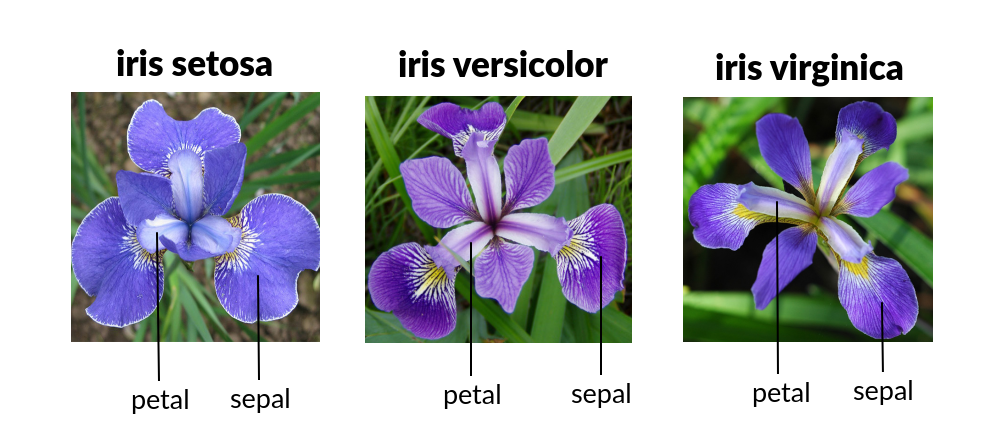

Basic info:
This dataset contains measuers of 3 species of irises

Aim: implement LinearRegression and k-means on this dataset, compare it with original data, 3d plot of clusters

In [2]:
iris = pd.read_csv('Iris.csv').drop(columns='Id') # original iris
x = iris.select_dtypes(include=np.number).values #  for Kmeans
iris_copy = iris.copy() # to use in further plots

In [3]:
iris.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [4]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
mapping = {'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3}


iris['Species'] = iris['Species'].replace(mapping)

In [6]:
X = iris.drop(columns='SepalLengthCm') # without feature we wanna predict
y = iris['SepalLengthCm'] #  with feature to predict

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y)

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import scorer, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression


pipeline = make_pipeline(StandardScaler(), LinearRegression())

pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [9]:
predicted = pipeline.predict(X_test)

In [10]:
np.mean(predicted)

5.935477136041083

In [11]:
r2_score(y_test, predicted)

0.8974187541650317

## implementing k-means

In [12]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300,
                 n_init=10, random_state=0)
    
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)

I'm going to use [elbow method](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/) to detect how much clusters will be the best approach.

In [13]:
fig = px.line(x=np.arange(1,11), y=wcss, 
              color_discrete_sequence=['black'])

fig.update_layout(xaxis=dict(title='number of clusters'),
                 yaxis=dict(title='WCSS'),
                 title=dict(text='Elbow method', x=.5, 
                           font=dict(size=30)),
                 font=dict(family='Lato', size=16))
fig.add_vline(x=3, line_width=3, line_dash='dash', line_color='green')

In [14]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,
               n_init=10, random_state=0)

y_kmeans = kmeans.fit_predict(x)

In [15]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Actual', 'Predicted'],
                   shared_xaxes=False, shared_yaxes=False) # making suplots with 2 columns and one row

# adding Iris setosa sepal-length and sepal-width to the plot
fig.add_trace(go.Scatter(
              x=iris_copy.loc[iris_copy.Species=='Iris-setosa','SepalLengthCm'].values,
              y=iris_copy.loc[iris_copy.Species=='Iris-setosa', 'SepalWidthCm'].values,
                        mode='markers',
                        name='Iris-setosa',
                        marker=dict(color='purple')), col=1, row=1
             ) 

# adding Iris versicolor sepal-length and sepal-width to the plot
fig.add_trace(go.Scatter(
    
              x=iris_copy.loc[iris_copy.Species=='Iris-versicolor','SepalLengthCm'].values,
              y=iris_copy.loc[iris_copy.Species=='Iris-versicolor','SepalWidthCm'].values,
                        mode='markers',
                        name='Iris-versicolor',
                        marker=dict(color='green')), col=1, row=1
             )

# adding Iris virginica sepal-length and sepal-width to the plot
fig.add_trace(go.Scatter(
              x=iris_copy.loc[iris_copy.Species=='Iris-virginica','SepalLengthCm'].values,
              y=iris_copy.loc[iris_copy.Species=='Iris-virginica', 'SepalWidthCm'].values,
                        mode='markers',
                        name='Iris-virginica',
                        marker=dict(color='blue')), col=1, row=1
             )


# K-means classified iris virginca as 0, that's why I'm ploting it first
fig.add_trace(go.Scatter(
              x=x[y_kmeans== 0,0],
              y=x[y_kmeans== 0,1],
                        showlegend=False,
                        mode='markers', name='Iris-virginica',
                        marker=dict(color='blue')),row=1, col=2)

# K-means classified iris setosa as 1 that's why I'm ploting it second
fig.add_trace(go.Scatter(
              x=x[y_kmeans== 1,0],
              y=x[y_kmeans== 1,1],
                        mode='markers', name='Iris-setosa',
                        showlegend=False,
                        marker=dict(color='purple')),row=1, col=2)

# K-means classified iris versicolor as 1 that's why I'm ploting it second
fig.add_trace(go.Scatter(
              x=x[y_kmeans== 2,0],
              y=x[y_kmeans== 2,1],
                        mode='markers', name='Iris-versicolor',
                        showlegend=False,
                        marker=dict(color='green')), row=1, col=2)

# some styling
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2.5,
                                        color='black')),
                  selector=dict(mode='markers')
                 )

fig.update_xaxes(title_text='SepalLenght')
fig.update_yaxes(title_text='SepalWidth', title_standoff=2)

fig.update_layout(title=dict(text='<b>Iris clustering<b>', x=.5, font=dict(size=24)), 
                  font=dict(family='Lato', size=14))

## 3D PLOT

In [16]:
fig = go.Figure()

# K-means classified iris virginca as 0, that's why I'm ploting it first
fig.add_trace(go.Scatter3d(
              x=x[y_kmeans== 0,0],
              y=x[y_kmeans== 0,1],
              z=x[y_kmeans==0, 2],
                        showlegend=False,
                        mode='markers', name='Iris-virginica',
                        marker=dict(color='blue')))


# K-means classified iris setosa as 1 that's why I'm ploting it second
fig.add_trace(go.Scatter3d(
              x=x[y_kmeans== 1,0],
              y=x[y_kmeans== 1,1],
              z=x[y_kmeans==0, 2],
                        mode='markers', name='Iris-setosa',
                        showlegend=False,
                        marker=dict(color='purple')))

# # K-means classified iris versicolor as 1 that's why I'm ploting it second
fig.add_trace(go.Scatter3d(
              x=x[y_kmeans== 2,0], 
              y=x[y_kmeans== 2,1],
              z=x[y_kmeans==0, 2],
                        mode='markers', name='Iris-versicolor',
                        showlegend=False,
                        marker=dict(color='green')))


fig.update_traces(marker=dict(size=12,
                              line=dict(width=2.5,
                                        color='black')),
                  selector=dict(mode='markers')
                 )

fig.update_xaxes(title_text='SepalLenght')
fig.update_yaxes(title_text='SepalWidth', title_standoff=2)

fig.update_layout(title=dict(text='<b>Iris clustering 3D<b>', x=.5, font=dict(size=24)), 
                  font=dict(family='Lato', size=14))




**x axis - sepal width**

**y axis - sepal length**

**z axis - petal length**